# Hypothesis testing

This jupyter notebook has been made with the goal to practice hypothesis testing like:
* Shapiro-Wilk test for normality
* T-test for the mean
* Mann-Whitney test for the median
* Wilcoxon test for the median
* Mood's median test
* Brown-Forsythe test for variance

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('dark_background')

from scipy import stats

## Functions

In [ ]:
def drow_to_hists(col):
  fig, ax=plt.subplots()
  df[df['CHAS']==0][col].hist(ax=ax, color='y', density=True, alpha=0.5)
  df[df['CHAS']==1][col].hist(ax=ax, color='r', density=True, alpha=0.5)
  ax.legend(['0', '1'])
  plt.show()

## DF_1

In [ ]:
! gdown --id 15zX7XDMpXtcYOUVFE_vtVLCFRmaNf4lt

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15zX7XDMpXtcYOUVFE_vtVLCFRmaNf4lt
To: /content/boston.csv
100% 41.4k/41.4k [00:00<00:00, 65.7MB/s]


* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per \$10,000 [\$/10k]
* PTRATIO: pupil-teacher ratio by town
* B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in \$ 1000's [k\$]

In [ ]:
df=pd.read_csv('/content/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Shapiro test

<Axes: >

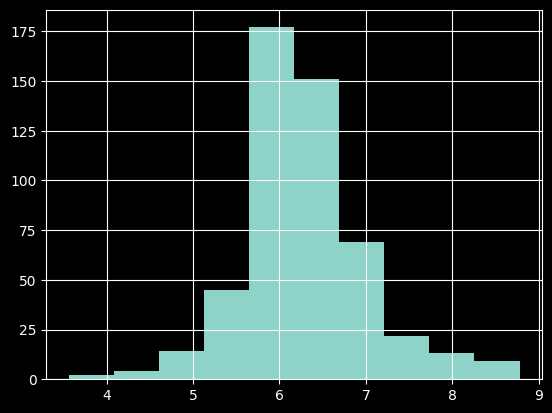

In [ ]:
df['RM'].hist()

In [ ]:
res=stats.shapiro(df['RM'])
print(f"p-value: {res[1]}")

p-value: 2.411976537849353e-10


<Axes: >

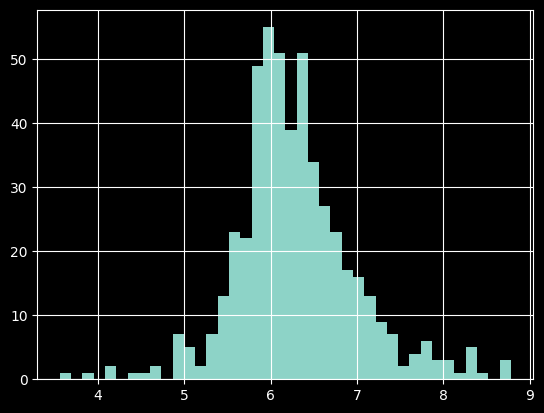

In [ ]:
df['RM'].hist(bins=40)

p-value was too small so we reject the null hypothesis about normality of ```df['RM']```. In the last histogram we can see, why

### Brown-Forsithe test + T-test

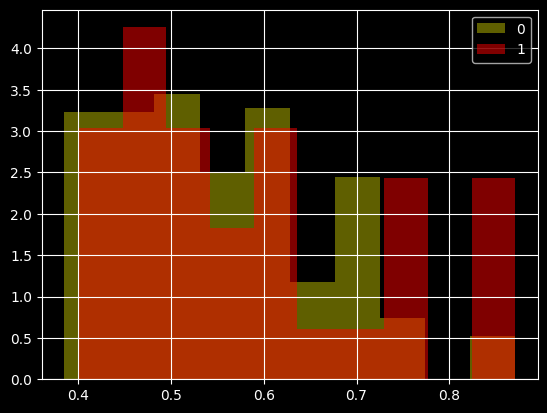

In [ ]:
drow_to_hists('NOX')

In [ ]:
print([df[df['CHAS']==0]['NOX'].mean(), df[df['CHAS']==1]['NOX'].mean()])

[0.5518169851380041, 0.5934257142857143]


Before we test equality of means first let's test equality of variances

In [ ]:
res=stats.levene(df[df['CHAS']==0]['NOX'], df[df['CHAS']==1]['NOX'], center='median')
print(f"p-value: {res[1]}")

p-value: 0.05607696596701407


p-value is bigger than 0.05 so we can't reject hypothesis about equality of variances

Let's make t-test

In [ ]:
res=stats.ttest_ind(df[df['CHAS']==0]['NOX'], df[df['CHAS']==1]['NOX'], equal_var=True)
print(f"p-value: {res[1]}")

p-value: 0.04029050097282664


And now it depends. If our α=0.05 we must reject null hypothesis about equlity of means. But if our α=0.01 or lower we can't reject it. It's our choice which α to pick. Let's set α=0.05 so we must reject null hypothesis. Means are not equal.

### Mann-Whitney test + Mood's median test

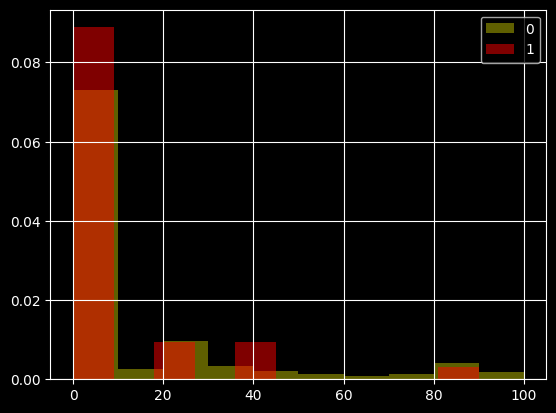

In [ ]:
drow_to_hists('ZN')

In [ ]:
print([df[df['CHAS']==0]['ZN'].median(), df[df['CHAS']==1]['ZN'].median()])

[0.0, 0.0]


In [ ]:
res=stats.mannwhitneyu(df[df['CHAS']==0]['ZN'], df[df['CHAS']==1]['ZN'])
print(f"p-value: {res[1]}")

p-value: 0.3463744319327413


In [ ]:
res=stats.median_test(df[df['CHAS']==0]['ZN'], df[df['CHAS']==1]['ZN'])
print(f"p-value: {res[1]}")

p-value: 0.48248475259226375


Mann-Whitney test and Mood's median test tell us that we can't reject hypothesis about equality of medians

## DF_2

In [ ]:
! gdown --id 1jJo6RR4spMtx7pjAfiqLi08JjgT7xAgn

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jJo6RR4spMtx7pjAfiqLi08JjgT7xAgn
To: /content/Life Expectancy Data.csv
100% 333k/333k [00:00<00:00, 36.7MB/s]


In [ ]:
df=pd.read_csv('/content/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [ ]:
len(df)-len(df.dropna())

1289

### Shapiro test

<Axes: >

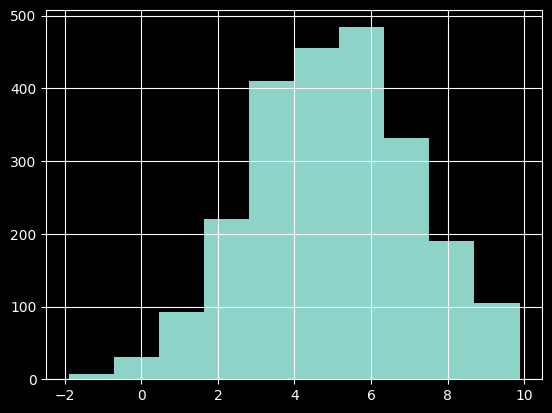

In [ ]:
df['percentage_expenditure_log']=np.log(0.05+df['percentage expenditure'])
x=df[df['percentage_expenditure_log']>-2]['percentage_expenditure_log']
x.hist()

In [ ]:
res=stats.shapiro(x)
print(f"p-value: {res[1]}")

p-value: 8.407595493481977e-07


We reject hypothesis about normality of this distribution

### Brown-Forsythe test + t-test

In [ ]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'percentage_expenditure_log'],
      dtype='object')

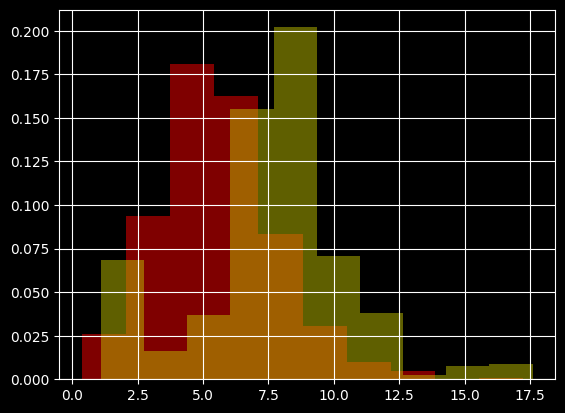

In [ ]:
fig, ax=plt.subplots()
#x=np.log(0.01+df[df['Status']=='Developing']['percentage expenditure'])
#x=x[x>-2]
#y=np.log(0.01+df[df['Status']=='Developed']['percentage expenditure'])
#y=y[y>-2]

x=df[df['Status']=='Developing']['Total expenditure'].dropna()
y=df[df['Status']=='Developed']['Total expenditure'].dropna()
x.hist(ax=ax, color='r', alpha=0.5, density=True)
y.hist(ax=ax, color='y', alpha=0.5, density=True)
plt.show()

In [ ]:
res=stats.levene(x,y, center='median')
print(f"p-value: {res[1]}")

p-value: 2.6371218515053664e-06


In [ ]:
res=stats.ttest_ind(x, y, equal_var=False)
print(f"p-value: {res[1]}")

p-value: 5.556249948178378e-37


We must reject the null hypothesis, so mean value of ```'Total expenditure'``` is bigger in ```'Developed'``` states.

### Mann-Whitney test + Mood's median test

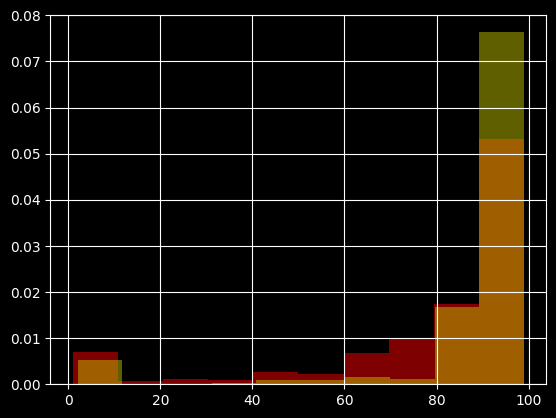

In [ ]:
fig, ax=plt.subplots()
x=df[df['Status']=='Developing']['Hepatitis B'].dropna()
y=df[df['Status']=='Developed']['Hepatitis B'].dropna()
x.hist(ax=ax, color='r', alpha=0.5, density=True)
y.hist(ax=ax, color='y', alpha=0.5, density=True)
plt.show()

In [ ]:
stats.mannwhitneyu(x,y)[1]

2.7657822660327863e-10

In [ ]:
[x.median(), y.median()]

[91.0, 95.0]

In [ ]:
stats.median_test(x,y)[1]

2.014286374698391e-14

We must reject the null hypothesis about equality of medians

### Wilcoxon test

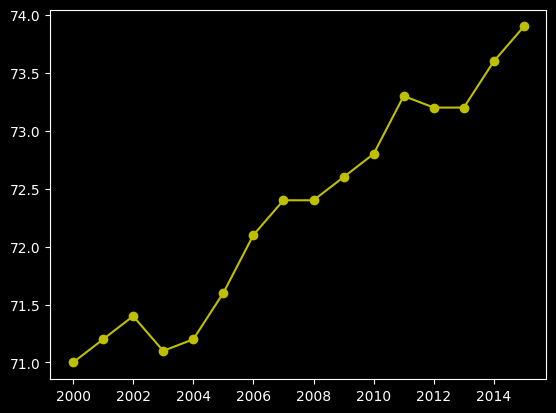

In [ ]:
df_0=df.groupby('Year')['Life expectancy '].median().reset_index()
fig, ax=plt.subplots()
ax.plot(df_0['Year'], df_0['Life expectancy '], color='y', marker='o')
plt.show()

In [ ]:
for yr in df['Year'].unique():
  print(f"{yr}: {len(df[df['Year']==yr]['Life expectancy '])}")

2015: 183
2014: 183
2013: 193
2012: 183
2011: 183
2010: 183
2009: 183
2008: 183
2007: 183
2006: 183
2005: 183
2004: 183
2003: 183
2002: 183
2001: 183
2000: 183


In [ ]:
x=df[df['Year']==2007].groupby('Country')['Life expectancy '].mean().reset_index()['Life expectancy ']
y=df[df['Year']==2008].groupby('Country')['Life expectancy '].mean().reset_index()['Life expectancy ']

In [ ]:
stats.wilcoxon(x,y)[1]

1.7238575272432847e-17

We must reject the null hypothesis about equality of medians

## DF_3

In [ ]:
! gdown --id 1zrBkLvMbanzavPiiF4qcQxi6wVlV84EM

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zrBkLvMbanzavPiiF4qcQxi6wVlV84EM
To: /content/Student Performance.csv
100% 57.0k/57.0k [00:00<00:00, 54.3MB/s]


In [ ]:
df=pd.read_csv('/content/Student Performance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


### Shapiro test

<Axes: >

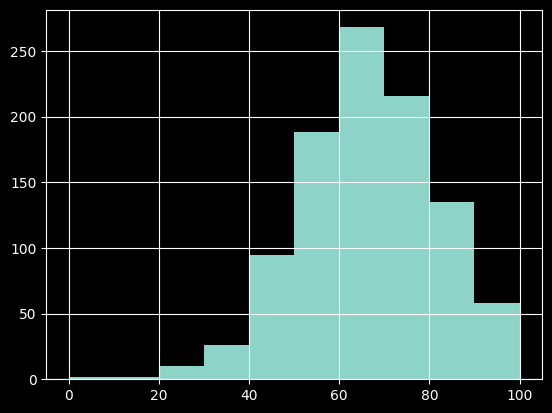

In [ ]:
df['math score'].hist()

In [ ]:
stats.shapiro(df['math score'])[1]

0.00014545719606603633

We must reject hyposesis about normality of this distribution. But knowing the rigor of Shapiro test, p-value=0.0001 is quite a big score.

### Brown-Forsythe test + t-test

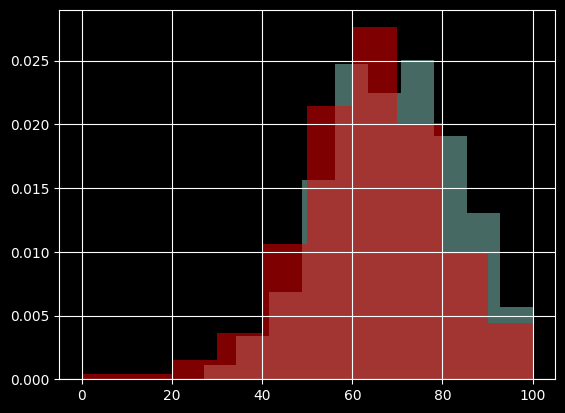

In [ ]:
x=df[df['gender']=='male']['math score']
y=df[df['gender']=='female']['math score']

fig, ax= plt.subplots()
x.hist(ax=ax, alpha=0.5, density=True)
y.hist(ax=ax, alpha=0.5, density=True, color='r')
plt.show()

In [ ]:
stats.levene(x,y, center='median')[1]

0.55630915751998

In [ ]:
stats.ttest_ind(x, y, equal_var=True)[1]

9.120185549328822e-08

We must reject the null hypothesis about equality of means

### Mann-Whitney test + Mood's median test

In [ ]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

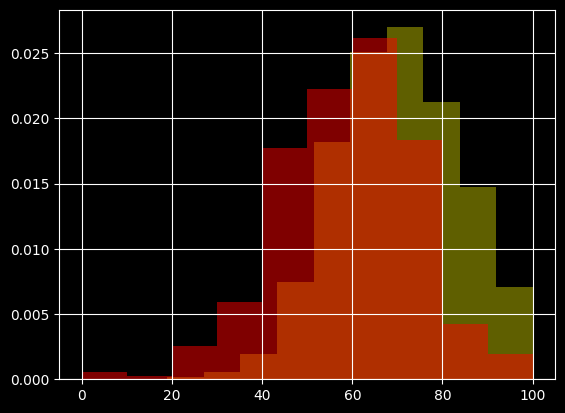

In [ ]:
x=df[df['lunch']=='standard']['math score']
y=df[df['lunch']=='free/reduced']['math score']

fig, ax=plt.subplots()
x.hist(ax=ax, alpha=0.5, density=True, color='y')
y.hist(ax=ax, alpha=0.5, density=True, color='r')
plt.show()

In [ ]:
stats.mannwhitneyu(x,y)[1]

1.522041803652298e-26

In [ ]:
stats.median_test(x,y)[1]

1.491008940037213e-17

We must reject the null hypothesis about equality of medians.

## DF_4

In [ ]:
! gdown --id 1GLIAhiwuq65yiBpAL4D9LWwKXrUiAq_D

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GLIAhiwuq65yiBpAL4D9LWwKXrUiAq_D
To: /content/mpg_raw.csv
100% 21.2k/21.2k [00:00<00:00, 33.2MB/s]


In [ ]:
df=pd.read_csv('/content/mpg_raw.csv', index_col='name')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa


In [ ]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN


### Shapiro test

<Axes: >

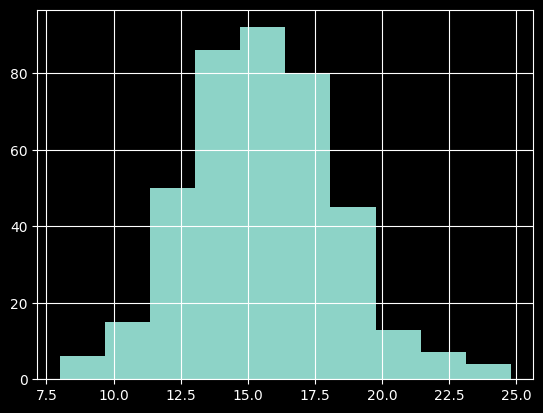

In [ ]:
df['acceleration'].hist()

In [ ]:
stats.shapiro(df['acceleration'])[1]

0.03986944421633885

Let's set our α=0.01, so we can't reject the null hypothesis about normality of this distribution

### Brown-Forsythe test + t-test

In [ ]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

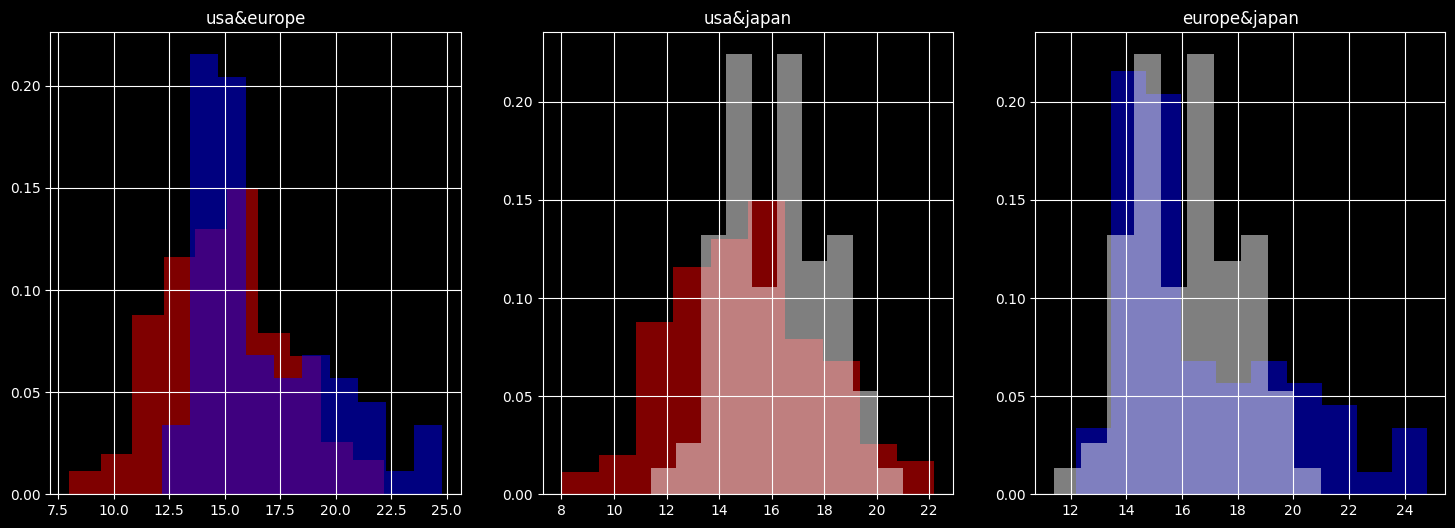

In [ ]:
x=df[df['origin']=='usa']['acceleration']
z=df[df['origin']=='japan']['acceleration']
y=df[df['origin']=='europe']['acceleration']

fig, axs=plt.subplots(1,3, figsize=(18,6))
x.hist(ax=axs[0], alpha=0.5, density=True, color='r')
x.hist(ax=axs[1], alpha=0.5, density=True, color='r')

y.hist(ax=axs[0], alpha=0.5, density=True, color='b')
y.hist(ax=axs[2], alpha=0.5, density=True, color='b')

z.hist(ax=axs[1], alpha=0.5, density=True, color='w')
z.hist(ax=axs[2], alpha=0.5, density=True, color='w')

axs[0].set_title('usa&europe')
axs[1].set_title('usa&japan')
axs[2].set_title('europe&japan')

plt.show()

In [ ]:
stats.levene(x,z, center='median')[1]

0.0031662912439459037

In [ ]:
stats.ttest_ind(x,z, equal_var=False)[1]

7.362848024465834e-05

We must reject the null hypothesis of eqality of means

### Mann-Whitney test + Mood's median test

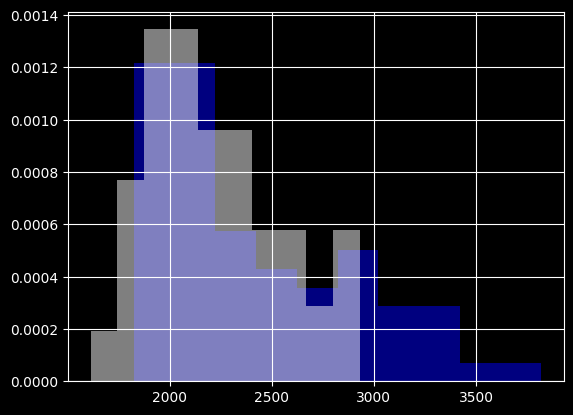

In [ ]:
x=df[df['origin']=='usa']['weight']
y=df[df['origin']=='europe']['weight']
z=df[df['origin']=='japan']['weight']

fig, ax=plt.subplots()
#x.hist(ax=ax, alpha=0.5, density=True, color='r')
y.hist(ax=ax, alpha=0.5, density=True, color='b')
z.hist(ax=ax, alpha=0.5, density=True, color='w')

plt.show()

In [ ]:
stats.mannwhitneyu(z,y)[1]

0.0347715799741095

In [ ]:
stats.median_test(z,y)[1]

0.22013623849287367

We must reject hypothesis about equality of medians(α=0.05). Because we that Mood's median test has a very big type II error. And in that case we'll belive in result of Mann-Whitney test.

## DF_5

In [ ]:
! gdown --id 1PThko18yiX_HHY6AVbjg7uTUBoi77_3b

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PThko18yiX_HHY6AVbjg7uTUBoi77_3b
To: /content/NHANES.csv
100% 762k/762k [00:00<00:00, 115MB/s]


In [ ]:
df=pd.read_csv('/content/NHANES.csv')
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [ ]:
len(df)-len(df.dropna())

5476

In [ ]:
df.describe(include='all')

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,...,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,...,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,...,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,...,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,...,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,...,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,...,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,...,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


### Shapiro test

<Axes: >

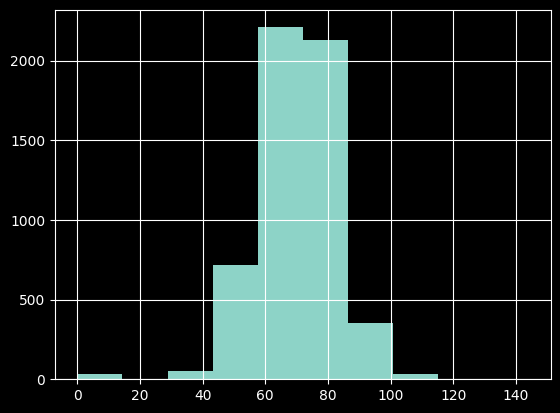

In [ ]:
df['BPXDI2'].hist()

In [ ]:
x=df['BPXDI2'].dropna()
x=x[x>20]
res=stats.shapiro(x)
print(f"p-value: {res[1]}")

p-value: 3.8921780038992585e-16


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5502.
  res = hypotest_fun_out(*samples, **kwds)


We must reject the null hypothesis about normality of this distribution

### Brown-Frosythe test + t-test

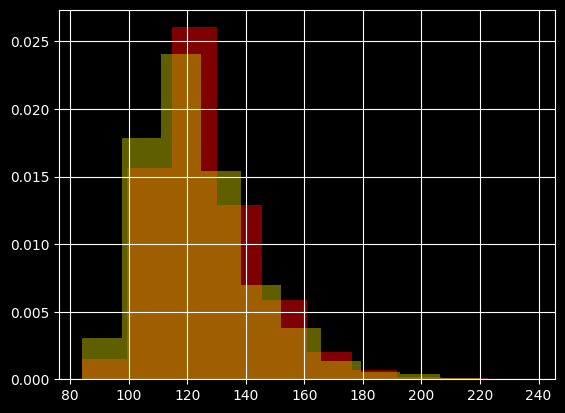

In [ ]:
x=df[df['RIAGENDR']==1]['BPXSY2'].dropna()
y=df[df['RIAGENDR']==2]['BPXSY2'].dropna()

fig, ax =plt.subplots()
x.hist(ax=ax, density=True, alpha=0.5, color='r')
y.hist(ax=ax, density=True, alpha=0.5, color='y')

plt.show()

In [ ]:
stats.levene(x,y, center='median')[1]

5.1365017475187774e-05

In [ ]:
stats.ttest_ind(x,y, equal_var=False)[1]

1.4765327675075595e-12

We must reject the null hypothesis about equality of means

### Mann-Whitney tets + Mood's median test

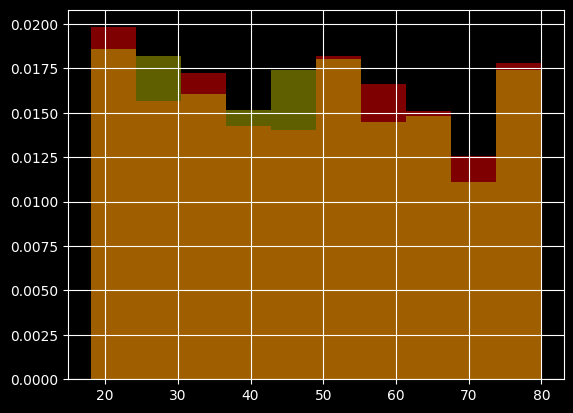

In [ ]:
x=df[df['RIAGENDR']==1]['RIDAGEYR'].dropna()
y=df[df['RIAGENDR']==2]['RIDAGEYR'].dropna()

fig, ax=plt.subplots()
x.hist(ax=ax, density=True, color='r', alpha=0.5)
y.hist(ax=ax, density=True, color='y', alpha=0.5)

plt.show()

In [ ]:
stats.mannwhitneyu(x,y)[1]

0.2707671958587432

In [ ]:
stats.median_test(x,y)[1]

0.041940686531372944

In this case(α=0.05) I trust Mood's test more and we reject the null hypothesis about equlity of medians. It's because Mood's test has problem with type II error, not I. And Mann-Whitney test not really tests equality of medians